## Pós Tech Fiap - Tech Challenge Fase 1

### Aplicando Modelo de aprendizagem de máquina para Previsão de Custos Médicos

#### Grupo 56
* Araguacy Bezerra Pereira    RM362367
* Emerson Vitorio de Oliveira RM362731
* Robson Carvalho Calixto     RM362870
* Vinicius Fernando M. Costa  RM363007


> Etapas do projetos

Podemos dividir o Processo de Ciência de Dados nas seguintes etapas:

* 1 - Definição do Problema
* 2 - Carga e Compreensão Geral dos Dados
* 3 - Análise Exploratória / Pré-Processamento dos Dados
* 4 - Modelagem
* 5 - Deploy do Modelo

## 1 - Definição do Problema de negócio

> Problema de négócio: **Quais fatores influenciam no custo médico, entender as relações entre as variáveis e gerar um modelo preditivo do valor do prêmio**

Fonte dos dados: [kaggle](https://www.kaggle.com/code/keremkarayaz/medical-insurance-prediction-94/input)

**Descrição dos dados:**

- Age - Idade do cliente
- Diabetes - Se a pessoa tem níveis anormais de açúcar no sangue
- BloodPressureProblems - Se a pessoa tem níveis anormais de pressão arterial
- AnyTransplants - Qualquer transplante de órgão importante          
- AnyChronicDiseases - Se o cliente sofre de doenças crônicas como asma       
- Height - Altura do cliente                  
- Weight - Peso do Cliente                   
- KnownAllergies - Se o cliente tem alguma alergia conhecida          
- HistoryOfCancerInFamily - Se algum parente consanguíneo do cliente teve algum tipo de câncer  
- NumberOfMajorSurgeries - O número de cirurgias importantes que a pessoa passou  
- PremiumPrice - Preço Premium Anual

**Questões norteadoras para análise dos dados**

Durante a análise exploratória, o objetivo será em responder algumas perguntas sobre a qualidade dos dados, compreensão geral do dataset, correlação entre as variávies, visualizações, possíveis tratamento e transformações.
Foco em compreender como as variáveis se relacionam com a variável alvo para o modelo preditivo de Machine Learning.

**Qualidade dos dados:**
- Existem valores faltantes?
- Qual a proporção?
- Existem dados duplicados?
- Alguma variável com valores inválidos?

**Engenharia de atributos:**
- Criar categorias de IMC (baixo, normal, sobrepeso, obeso)?
- Criar uma variável binária: tem_doenca = 1 se tiver qualquer condição crônica/câncer/transplante?

**Compreensão geral das variáveis numéricas:**
- Qual é a distribuição das variáveis quantitativas? É normal? Assimétrica?
- Quais são as medidas de tendência central (média, mediana, moda) ?
- Quais são as medidas de dispersão (amplitude, desvio padrão, variância)
- Existem outliers (valores extremos)?

**Compreensão geral das variávies categóricas:**
- Frequência das variáveis categorias.
- Pessoas com doenças crônicas têm prêmio médio maior?
- Quem já fez transplante paga mais seguro?
- Existe diferença de média de PremiumPrice entre quem tem ou não histórico de câncer?
- Qual é a distribuição etária dos indivíduos?
- Há diferença o preço do plano de saúde entre pessoas com e sem histórico familiar de câncer?

**Qual é o percentual de pessoas com:**
- Diabetes (Diabetes)
- Problemas de pressão (BloodPressureProblems)
- Doenças crônicas (AnyChronicDiseases)
- Histórico de câncer na família (HistoryOfCancerInFamily)
- Transplantes (AnyTransplants)
- Qual o percentual de pacientes com sobrepeso ou obesidade (com base no IMC)?

**Compreensão da variável alvo PremiumPrice com as demais variáveis independentes:**
- O valor do prêmio parece seguir uma tendência linear ou não-linear com idade/IMC?
- Há evidências de que imc influencia o valor do seguro?
- Qual o prêmio médio pago por pessoas com e sem doenças crônicas?
- Pacientes com múltiplas comorbidades têm prêmios mais altos?
- A idade tem relação linear com o preço do seguro?
- PremiumPrice varia significativamente com a idade?
- Quais faixas etárias concentram os maiores valores de prêmio?
- Qual é a média de PremiumPrice por faixa etária (ex: 18–24, 25–39, etc)?
- Quais variáveis têm maior correlação com o valor do seguro?

**Multicolinearidade:**
- Algumas variáveis estão fortemente correlacionadas entre si? Se sim, pode atrapalhar a regressão linear?
- Avaliar com: matriz de correlação + VIF (Variance Inflation Factor) 

In [201]:
# Importar as bibliotecas usadas no projeto
import pandas as pd
import numpy as np

# Analises estatisticas
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, kruskal, f_oneway, pearsonr, spearmanr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Bibliotecas para manipulação gráfica
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

> Configurações de gerais do notebook

In [202]:
# Definir uma semente para o gerador de números aleatórios
np.random.seed(42)
#Para ignorar os avisos
warnings.filterwarnings('ignore')
sns.set_theme(style = "whitegrid")
%matplotlib inline

In [203]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())
print('')
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Tech Challenge - Grupo 56" --iversions

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.2

Author: Tech Challenge - Grupo 56

pandas     : 2.2.3
numpy      : 2.2.6
matplotlib : 3.10.3
statsmodels: 0.14.4
platform   : 1.0.8
sklearn    : 1.6.1
scipy      : 1.15.3
seaborn    : 0.13.2



## 2 - Carregando e explorando os dados

* Obter uma visão geral dos dados e responder as questões norteadoras do projeto.

In [204]:
df_original = pd.read_csv("data/Medicalpremium.csv")

In [205]:
df_original.shape

(986, 11)

> 📄 Interpretação: Tabela com 986 registros e 11 colunas
> 

In [206]:
df_original.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [207]:
"""
    Comando .info() utilizado para exibir informações resumidas sobre o DataFrame "df_original", resultado:
        Número total de entradas (ou linhas).<br>
        Lista das colunas, com:
            - Nome da coluna
            - Quantidade de valores não nulos em cada coluna
            - Tipo de dado de cada coluna (por exemplo: int64, float64, object etc.)
"""
# Exibir metadados do dataset
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


> Interpretação: Todas as variáveis com Dtype int64, tipagem correta será ajustada no análise exploratória / pré-processamento
>

In [208]:
"""
    Comandos .isnull() - True indica que o valor é nulo (NaN), e False indica que não é nulo
             .sum() - Soma os True em cada coluna
             .sort_values(ascending=False) - Organiza o resultado em ordem decrescente, ou seja, da coluna com mais nulos para a com menos nulos
"""
# Verificando valores ausentes
df_original.isnull().sum().sort_values(ascending = False)

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

> 📄 Interpretação: Dataset sem valores ausentes
> 

In [209]:
# Verificando a existência de registros duplicados
df_original.duplicated().sum()

np.int64(0)

> 📄 Interpretação: Dataset ok, possivelmente já foi pré-tratado por ser uma base origem Kaggle

**Questões sobre Qualidade dos dados:**
- Existem valores faltantes? Qual a proporção?
    - Não existem valores faltantes em nenhuma variável.
- Existem dados duplicados?
    - Não existem dados duplicados.
- Alguma variável com valores inválidos?
    - Nenhuma anomalia.

In [210]:
"""
    Comando .describe() retorna estatísticas resumidas para colunas numéricas (por padrão), resultado:
        count --> Número de valores não nulos
        mean  --> Média dos valores<br>
        std   --> Desvio padrão<br>
        min   --> alor mínimo<br>
        25%   --> 1º quartil (25% dos dados abaixo desse)<br>
        50%   --> Mediana (2º quartil)<br>
        75%   --> 3º quartil (75% dos dados abaixo desse)<br>
        max   --> Valor máximo<br>
"""
# Resumo estatístico para variáveis quantitativas
df_original[['Age', 'Height','Weight','NumberOfMajorSurgeries','PremiumPrice']].describe()


,Age,Height,Weight,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,168.182556,76.950304,0.667343,24336.713996
std,13.963371,10.098155,14.265096,0.749205,6248.184382
min,18.000000,145.000000,51.000000,0.000000,15000.000000
25%,30.000000,161.000000,67.000000,0.000000,21000.000000
50%,42.000000,168.000000,75.000000,1.000000,23000.000000
75%,53.000000,176.000000,87.000000,1.000000,28000.000000
max,66.000000,188.000000,132.000000,3.000000,40000.000000


> 📄 Interpretação: 
> 
Resumo estatístico aponta valores outliers em duas variáveis
Variável alvo PremiumPrice o valor máximo está longe da média e a variável Weight o valor máximo também distante de média.

In [211]:

total_pacientes = len(df_original)

### Funções do projeto

In [212]:
def classificar_faixa_etaria(idade):
    """
        Função: função para classificar a faixa etária e categoria de IMC
        Objetivo: Definir ranges de faixa etária
        Paramêtros: Variável númerica inteira
        Retorno: Classificação da faixa etária e número ordinal
    """
    if idade >= 0 and idade <= 5:
        return 'Primeira infância',1       # 0 a 5 anos
    elif idade >= 6 and idade <= 12:
        return 'Infância' ,2               # 6 a 12 anos
    elif idade >= 13 and idade <= 17:
        return 'Adolescência',3            # 13 a 17 anos
    elif idade >= 18 and idade <= 24:
        return 'Jovem adulto' ,4           # 18 a 24 anos
    elif idade >= 25 and idade <= 39:
        return 'Adulto' ,5                 # 25 a 39 anos
    elif idade >= 40 and idade <= 59:
        return 'Meia-idade',6              # 40 a 59 anos
    elif idade >= 60 and idade <= 74:
        return 'Idoso' ,7                  # 60 a 74 anos
    elif idade >= 75:
        return 'Idoso longevo',8           # 75+ anos
    else:
        return 'Idade inválida'



In [213]:
def calcular_imc(peso, altura):
    """
        Função: Calcular o IMC (Índice de Massa Corpórea)
        Objetivo: Calcular o IMC com base no peso (kg) e altura (m) e classificar os indices de massa corpórea
        Paramêtros: peso e altura
        Retorno: O índice do IMC e a classificação
    """

    imc = peso / (altura ** 2)
    
    if imc < 18.5:
        classificacao = "Abaixo do peso"
    elif 18.5 <= imc < 25:
        classificacao = "Peso normal"
    elif 25 <= imc < 30:
        classificacao = "Sobrepeso"
    elif 30 <= imc < 35:
        classificacao = "Obesidade grau I"
    elif 35 <= imc < 40:
        classificacao = "Obesidade grau II"
    else:
        classificacao = "Obesidade grau III"

    return imc, classificacao

> Vamos a uma explicação sobre o IQR e Outliers
> 
O IQR é a diferença entre o terceiro quartil(Q3) e o primeiro quartil(Q1): IQR = Q3-Q1
Q1 (1º quartil): é o valor abaixo do qual estão 25% dos dados
Q3 (3º quartil): é o valor abaixo do qual estão 75% dos dados

Valores considerados outliers se estiverem fora desse limites (1.5 margem aceitável de variação):

    Limite Inferior: Q1 - 1.5 x IQR
    Limite Superior: Q3 - 1.5 x IQR
    
Esses limites são chamados de limites de Tukey. Tudo fora disso é potencial outlier.
A multiplicação por 1.5 é um fator de tolerância, criado por John Tukey, o estatístico que inventou o boxplot.
Uma maneira simples e automático de encontrar valores que estão fora da faixa normal dos dados, sem precisar de suposições sobre a distribuição (tipo normalidade).

In [214]:
def analise_estatistica_graficos(dataframe, coluna, titulo = ""):

    """
        Função: Indentificar e visualizar outliers (valores discrepantes). 
        Objetivo: Calcular Q1, Q3 e IQR (medidas estatísticas da distribuição), os outliers e exibir informações estatísticas importantes sobre a distribuição dos dados.
        Paramêtros: dataframe, coluna a variável alvo de análise e opcional o título do gráfico.
        Retorno: Retorna um dicionário com os valores calculados e os DataFrames contendo os outliers
    """

    # Estatísticas principais
    mean = dataframe[coluna].mean() 
    std = dataframe[coluna].std()
    median = dataframe[coluna].median()
    skew = dataframe[coluna].skew()
    kurt = dataframe[coluna].kurtosis()
    MIN  = dataframe[coluna].min()
    MAX  = dataframe[coluna].max()    
    Q1     = dataframe[coluna].quantile(0.25)
    Q3     = dataframe[coluna].quantile(0.75)
    IQR    = Q3 - Q1
    CUT_OFF = 1.5 * IQR
    limite_inf_1_5  = Q1 - CUT_OFF
    limite_sup_1_5  = Q3 + CUT_OFF

    outliers_1_5 = dataframe[(dataframe[coluna] < limite_inf_1_5) | (dataframe[coluna] > limite_sup_1_5)]

    print("Q1:", Q1)
    print("Q3:", Q3)
    print("IQR (Interquartile Range):", IQR)
    print("--------------------------------------")
    print("Limite inferior 1.5:", limite_inf_1_5)
    print("Limite superior 1.5:", limite_sup_1_5)
    print(f"Número de outliers 1.5: {outliers_1_5.shape[0]}")

    # Garantir que a coluna seja float
    data = dataframe[coluna].dropna()
    try:
        data = data.str.replace(',', '.').astype(float)
    except AttributeError:
        data = data.astype(float)

   
    # Criar subplots
    fig, axs = plt.subplots(2, 1, figsize=(16, 8), 
                            gridspec_kw={'height_ratios': [0.25, 0.7], 'hspace': 0.00},
                            sharex=True)

    # Boxplot com Seaborn
    sns.boxplot(x=data, ax=axs[0], color='lightgreen', fliersize=4, linewidth=1, width=0.4)

    axs[0].axvline(mean, color='green', linestyle='--', linewidth=2, label='Média')
    axs[0].axvline(median, color='purple', linestyle='-.', linewidth=2, label='Mediana')
    axs[0].set_ylabel("Freq. Absoluta")
    axs[0].legend(loc='upper right')
    axs[0].set_title(f'{titulo}\n\n Boxplot e Distribuição da variável "{coluna}" \n\n')

    # Histograma + KDE
    sns.histplot(data, kde=True, stat='count', bins=20, color='skyblue', edgecolor='black', ax=axs[1])

    # Garante que std > 0 para evitar divisão por zero
    if std == 0 or np.isnan(std):
        std = 1e-6  # valor pequeno só para a curva não quebrar

    axs[1].axvline(mean, color='green', linestyle='--', linewidth=2, label='Média')
    axs[1].axvline(median, color='purple', linestyle='-.', linewidth=2, label='Mediana')
    if limite_inf_1_5 > 0:
        axs[1].axvline(limite_inf_1_5, linestyle='--', color='darkblue', linewidth=2, alpha=1, label='Limite Inferior')
    if limite_sup_1_5 > 0:
        axs[1].axvline(limite_sup_1_5, linestyle='--', color='darkblue', linewidth=2, alpha=1, label='Limite Superior')

    # Outliers como pontos
    outliers = data[(data < limite_inf_1_5) | (data > limite_sup_1_5)]
    axs[1].scatter(outliers, np.zeros_like(outliers), color='red', zorder=5)

    # Caixa de estatísticas
    stats_text = '\n'.join((
        f'Média: {mean:,.2f}',
        f'Mediana: {median:,.2f}',
        f'Desvio Padrão: {std:,.2f}',
        f'Assimetria: {skew:.2f}',
        f'Curtose: {kurt:.2f}',
        f'Mínimo: {MIN:,.2f}',
        f'Máximo: {MAX:,.2f}',
        f'Q1: {Q1:,.2f}',
        f'Q3: {Q3:,.2f}'
    ))

    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    axs[1].text(0.30, 0.95, stats_text, transform=axs[1].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

    axs[1].set_xlabel(coluna)
    axs[1].set_ylabel('Frequência Absoluta')
    axs[1].legend()
    axs[0].grid(False)
    axs[1].grid(False)

    plt.tight_layout()
    plt.show()

In [215]:
def comparar_grupos_categoricos(df, categorias, target):
    
    """
        Função: Comparar grupos de uma ou mais variáveis categóricas versus a variável numérica (target), escolhendo o 
                teste estatístico adequado automaticamente (teste paramétrico ou não-paramétrico).
        Objetivo: Realizar o teste significancia estatística dos grupos categóricos e normalidade. 
                  2 grupos + normalidade: t-test
                  2 grupos + não normal: Mann-Whitney U
                  3+ grupos + normalidade: ANOVA
                  3+ grupos + não normal: Kruskal-Wallis
        Paramêtros: Dataset, variáveis categoricas, variável target numérica
        Retorno: Dataframe, com nome da variável, o teste estatistico realizado, p-valor e a significancia

    """
    resultados = []
   
    for grupo in categorias:
        unique_vals = df[grupo].dropna().unique() 
        group_data = []    
        normalities = []  

        for val in unique_vals:
            sample = df[df[grupo] == val][target].dropna()
            group_data.append(sample)

            if len(sample) >= 3:
                stat, p = shapiro(sample.sample(min(len(sample), 500), random_state=42))
            else:
                p = 0  
            normalities.append(p > 0.05) 

        if len(unique_vals) == 2:
            if all(normalities):
                stat, pval = ttest_ind(group_data[0], group_data[1], equal_var=False)
                test_name = "t-test"
            else: 
                stat, pval = mannwhitneyu(group_data[0], group_data[1], alternative="two-sided")
                test_name = "Mann-Whitney U"
        else:
            # Mais de 2 grupos: ANOVA ou Kruskal-Wallis
            if all(normalities):
                stat, pval = f_oneway(*group_data)
                test_name = "ANOVA"
            else:
                stat, pval = kruskal(*group_data)
                test_name = "Kruskal-Wallis"

        resultados.append({
            "Variável": grupo,
            "Grupos": list(unique_vals),
            "Teste": test_name,
            "p-valor": round(pval, 4),
            "Resultado": "Significativo" if pval < 0.05 else "Não significativo"
        })

    return pd.DataFrame(resultados)

In [216]:
def analisar_correlacoes_com_target(df, variaveis, target, exibir_graficos=True):
    """
        Função: analisar_correlacoes_com_target
        Objetivo: Calcular correlações estatísticas entre um conjunto de variáveis independentes(variaveis) e uma variável alvo(target), gerando resultados
                numéricos (coeficientes de correlação) e, opcionalmente, gráficos de dispersão com linha de regressão.
                Pearson: mede correlação linear (requer dados contínuos e distribuição normal).
                Spearman: mede correlação monotônica (mais robusta, funciona com dados ordinais ou não-lineares).
        Paramêtros: df: DataFrame com os dados.
                    variaveis: lista de variáveis numéricas que você quer correlacionar com o target.
                    target: nome da variável numérica alvo (dependente).
                    exibir_graficos: se True, exibe gráficos de dispersão com linha de tendência.
        Retorno: A função retorna um DataFrame com os seguintes dados para cada variável analisada
    """    
    resultados = []
    if exibir_graficos:
        n_vars = len(variaveis)
        n_cols = min(3, n_vars)  # Máximo 3 colunas
        n_rows = (n_vars + n_cols - 1) // n_cols  
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 5*n_rows))
        
        if n_rows == 1 and n_cols == 1:
            axes = np.array([[axes]])
        elif n_rows == 1 or n_cols == 1:
            axes = np.array([axes]).reshape(n_rows, n_cols)

    for i, var in enumerate(variaveis):
        dados_validos = df[[var, target]].dropna()
        r_pearson, p_pearson = pearsonr(dados_validos[var], dados_validos[target])
        r_spearman, p_spearman = spearmanr(dados_validos[var], dados_validos[target])
        
        resultados.append({
            'variavel': var,
            'pearson_r': round(r_pearson, 4),
            'pearson_p': round(p_pearson, 4),
            'spearman_r': round(r_spearman, 4),
            'spearman_p': round(p_spearman, 4)
        })

        if exibir_graficos:
            row_idx = i // n_cols
            col_idx = i % n_cols
            
            sns.regplot(x=var, y=target, data=dados_validos, 
                       scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, 
                       ax=axes[row_idx, col_idx])
            
            axes[row_idx, col_idx].set_title(f'Dispersão: {var} vs {target}')
            axes[row_idx, col_idx].set_xlabel(var)
            axes[row_idx, col_idx].set_ylabel(target)
            axes[row_idx, col_idx].grid(True)

    if exibir_graficos:
        for i in range(n_vars, n_rows * n_cols):
            row_idx = i // n_cols
            col_idx = i % n_cols
            fig.delaxes(axes[row_idx, col_idx])
            
        plt.tight_layout()
        plt.show()

    return pd.DataFrame(resultados)

In [217]:
def plotar_heatmap_correlacoes(df, colunas, metodo='pearson'):

    """
    Função: plotar_heatmap_correlacoes --> Gerar um heatmap (mapa de calor) para visualizar a correlação entre variáveis numéricas.
    Objetivo: Exibir visualmente as correlações entre um conjunto de variáveis, facilitando a identificação de relações fortes (positivas ou negativas).
              Calcular a matriz de correlação utilizando o método (pearson ou spearman) recebido como paramêtro.
                  pearson  --> linear, variáveis contínuas, pressupõe normalidade e sensível a outliers
                  spearman --> monótona por ranking (ordens), variáveis contínuas/ordinais, não requer normalidade, menos sensível a outliers
              Resultado é uma matriz com valores entre -1 e 1:
                  1 = correlação perfeita positiva<br>
                 -1 = correlação perfeita negativa<br>
                  0 = sem correlação
    Paramêtros: dataframe, vetor de colunas, metodo= default('pearson')
    Retorno:
    """
    df_corr = df[colunas].dropna()  # remove nulos

    matriz_corr = df_corr.corr(method=metodo)  # pearson ou 'spearman'

    plt.figure(figsize=(16, 6))
    sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title(f'Heatmap de Correlação ({metodo})')
    plt.tight_layout()
    plt.show()

## 3 - Análise Exploratória dos Dados / Pré-processamento
* Nesta etapa vamos explorar os dados e compreender como estão organizados com a ajuda da Estatística e responder as questões norteadoras.
* Aplicação da técnica de Data Wrangling para limpar, transformar e preparar os dados brutos para análise, modelagem e visualização.

### Engenharia de atributos
* Classificar faixa etária
* Calcular IMC
* Classificar se tem doença

In [218]:
df_dados = df_original
df_dados[['faixa_etaria', 'ordem_faixa']] = df_dados['Age'].apply(lambda x: pd.Series(classificar_faixa_etaria(x)))
df_dados[['imc', 'categoria_imc']] = df_dados.apply(
    lambda row: pd.Series(calcular_imc(row['Weight'], row['Height'] / 100)),
    axis=1
)

# Realizando a ordenação das categorias do IMC:
# - Convertendo a coluna categoria_imc para um tipo Categorical ordenado, útil para visualizações e ordenações corretas.
ordem_categorias = [
    'Abaixo do peso',
    'Peso normal',
    'Sobrepeso',
    'Obesidade grau I',
    'Obesidade grau II',
    'Obesidade grau III'
]
df_dados['categoria_imc'] = pd.Categorical(
    df_dados['categoria_imc'],
    categories=ordem_categorias,
    ordered=True
)

# Ordenando as categorias de faixa etária:
# - 'Primeira infância', 'Infância',  'Adolescência',  'Jovem adulto', 'Adulto', 'Meia-idade', 'Idoso', 'Idoso longevo'
# - Convertendo faixa_etaria para um tipo Categorical ordenado.

ordem_faixa = ['Primeira infância', 'Infância',  'Adolescência',  'Jovem adulto', 'Adulto', 'Meia-idade', 'Idoso', 'Idoso longevo']
df_dados['faixa_etaria'] = pd.Categorical(
    df_dados['faixa_etaria'],
    categories=ordem_faixa,
    ordered=True
)

df_dados['tem_doenca'] = df_dados[['Diabetes', 'BloodPressureProblems', 'AnyChronicDiseases', 'AnyTransplants']].any(axis=1).astype(int)


In [219]:
df_dados.shape

(986, 16)

> Interpretação: Criação de novas variáveis para auxiliar a analisar os dados e obter insights
    
**Questões sobre Engenharia de atributos:**
- Criar categorias de IMC (baixo, normal, sobrepeso, obeso)?
    - Observar como a variável PremiumPrice varia entre as faixas de categorias de IMC
- Criar uma variável binária: tem_doenca = 1 se tiver qualquer condição crônica/câncer/transplante?
    - Observar a variação de preço quando o cliente possui alguma condição de saúde.

### Frequência absoluta/percentual das variáveis categóricas

In [220]:
variaveis_categoricas = [
    'Diabetes',
    'BloodPressureProblems',
    'AnyTransplants',
    'AnyChronicDiseases',
    'KnownAllergies',
    'HistoryOfCancerInFamily',
    'tem_doenca',
    'faixa_etaria',
    'categoria_imc'
]

tabela_resultados = []

for var in variaveis_categoricas:
    freq_abs = df_dados[var].value_counts(dropna=False)
    freq_pct = df_dados[var].value_counts(normalize=True, dropna=False) * 100

    # Itera sobre os valores e armazena os resultados
    for categoria in freq_abs.index:
        tabela_resultados.append({
            'Variável': var,
            'Categoria': categoria,
            'Frequência Absoluta': freq_abs[categoria],
            'Percentual (%)': round(freq_pct[categoria], 2)
        })


df_frequencias = pd.DataFrame(tabela_resultados)
pd.set_option('display.max_rows', None)
display(df_frequencias)


,Variável,Categoria,Frequência Absoluta,Percentual (%)
0,Diabetes,0,572,58.01
1,Diabetes,1,414,41.99
2,BloodPressureProblems,0,524,53.14
3,BloodPressureProblems,1,462,46.86
4,AnyTransplants,0,931,94.42
5,AnyTransplants,1,55,5.58
6,AnyChronicDiseases,0,808,81.95
7,AnyChronicDiseases,1,178,18.05
8,KnownAllergies,0,774,78.50
9,KnownAllergies,1,212,21.50


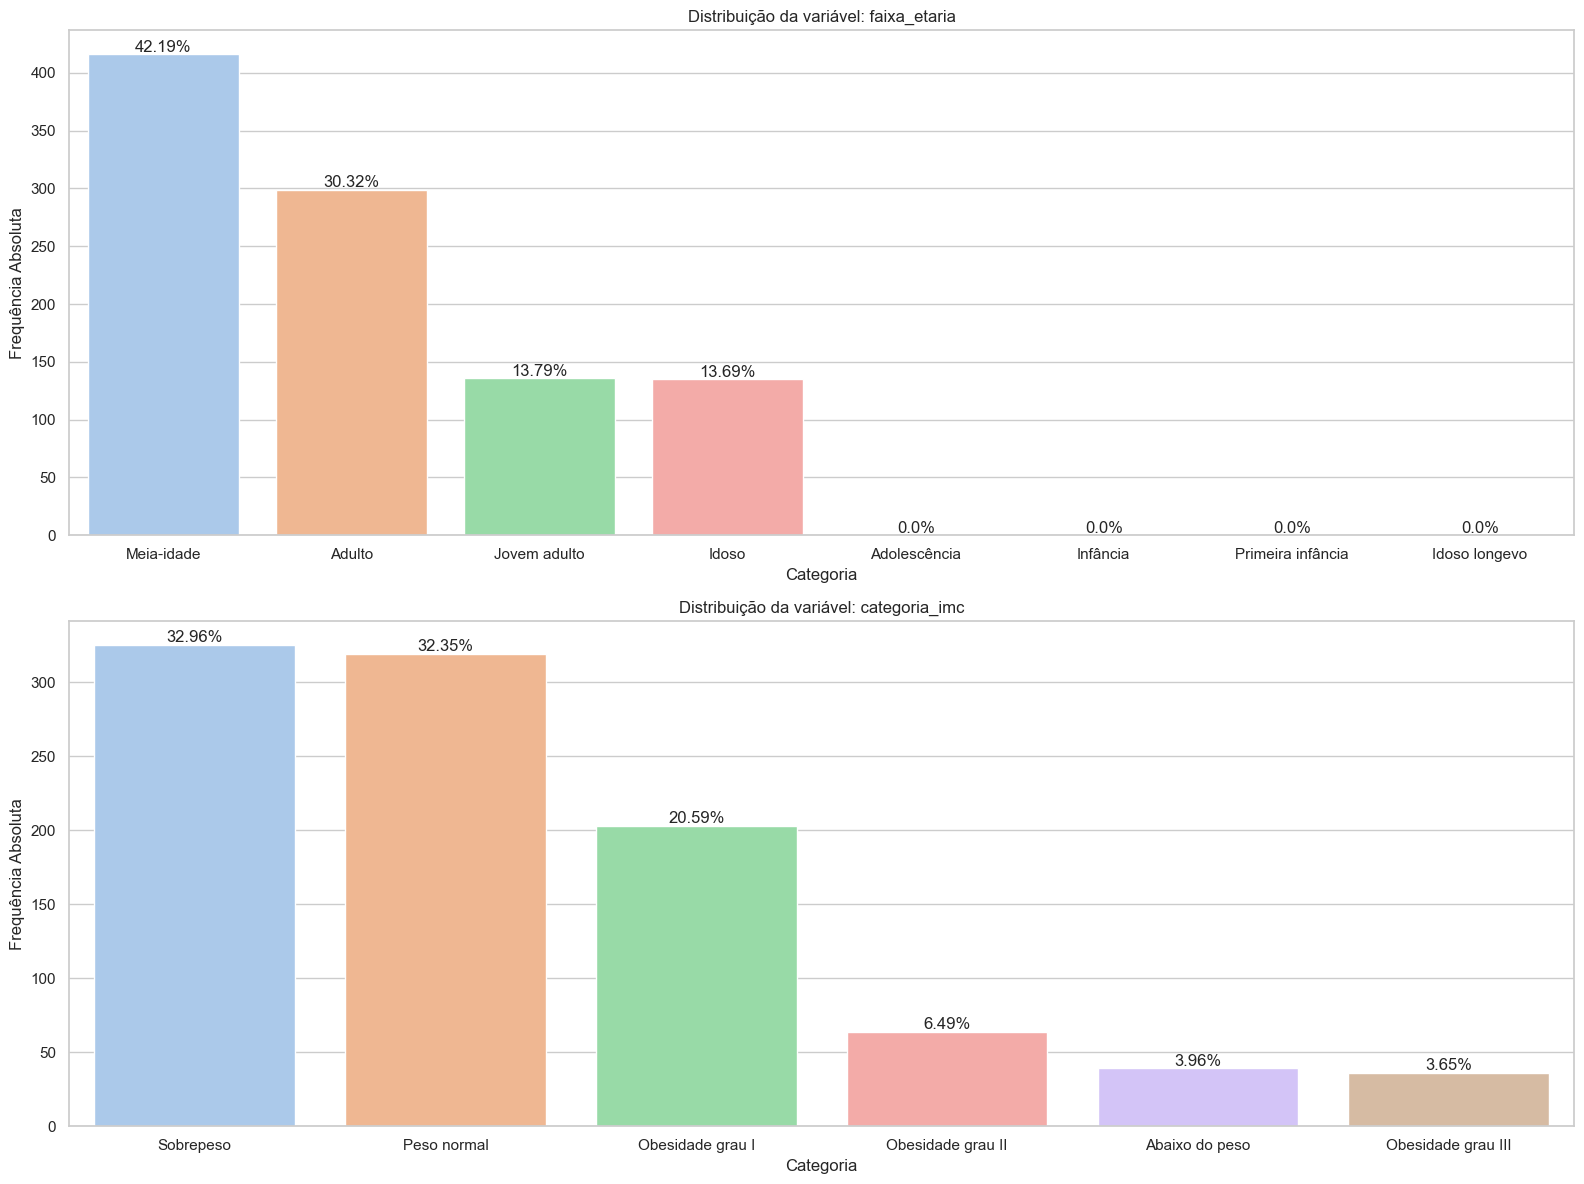

In [221]:
# % Percentual de frequência para as variáveis faixa etária e categoria imc
variaveis_categoricas = [
    'faixa_etaria',
    'categoria_imc'
]
plt.figure(figsize=(16, 6 * len(variaveis_categoricas)))

for i, var in enumerate(variaveis_categoricas):
    plt.subplot(len(variaveis_categoricas), 1, i+1)
    dados_var = df_frequencias[df_frequencias['Variável'] == var]
    sns.barplot(data=dados_var, x='Categoria', y='Frequência Absoluta', palette='pastel')
    
    for index, row in dados_var.iterrows():
        plt.text(x=index - dados_var.index.min(), y=row['Frequência Absoluta'] + 2,
                 s=f"{row['Percentual (%)']}%", ha='center')

    plt.title(f'Distribuição da variável: {var}', fontsize=12)
    plt.ylabel('Frequência Absoluta')
    plt.xlabel('Categoria')

plt.tight_layout()
plt.show()


> Interpretação: Frequência absoluta/percentual das variáveis categóricas.
    
**Questões sobre Qual é o percentual de pessoas com:**
    
- Diabetes (Diabetes) ->
    - 58% não tem diabetes e 42% com diabetes.
- Problemas de pressão (BloodPressureProblems)
    - 53% apresenta problemas com pressão.
- Doenças crônicas (AnyChronicDiseases)
    - 82% não apresenta doenças crônicas contra 18% que tem a doença.
- Histórico de câncer na família (HistoryOfCancerInFamily)
    - 11.7% das pessoas tem registro de histórico de câncer na familia. 
- Transplantes (AnyTransplants)
    - Apenas 55 pessoas fizeram algum transplante representando 5.6% da base.
- Qual o percentual de pacientes com sobrepeso ou obesidade (com base no IMC)?
    - Agrupando as pessoas acima do peso normal soma-se 67% da base, avaliar se a média do seguro varia entre os grupos.
- Em análise as faixa etárias 72% são entre Adulto e Meia-Idade, ausência dos grupos abaixo de 18 anos e acima de 75 anos. O modelo são será capaz de prever o valor do prêmio para pessoas nessas faixas etárias por falta de dados representativos.


### Distribuição das variáveis quantitativas:

Q1: 21000.0
Q3: 28000.0
IQR (Interquartile Range): 7000.0
--------------------------------------
Limite inferior 1.5: 10500.0
Limite superior 1.5: 38500.0
Número de outliers 1.5: 6


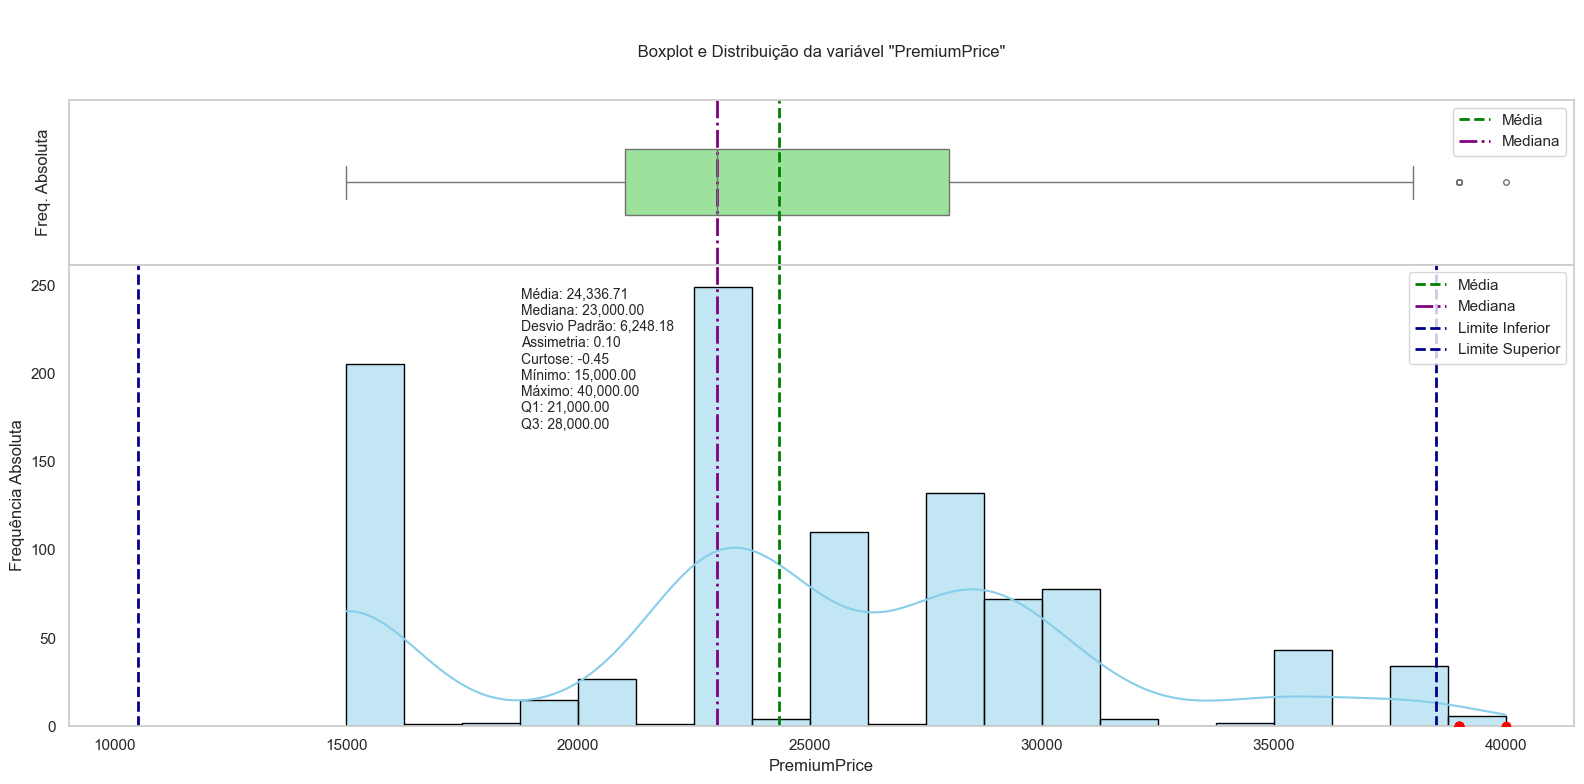

In [222]:
# Análise estatistica descritiva 
analise_estatistica_graficos(df_dados, 'PremiumPrice' )

> 📄 Interpretação: Análise Descritiva da Variável PremiumPrice
>

📊  A variável PremiumPrice apresenta uma média de aproximadamente 24.336,71, enquanto a mediana é 23.000,00, indicando uma distribuição levemente assimétrica à direita (positiva), com presença de alguns valores mais altos que puxam a média para cima.

O desvio padrão é de aproximadamente 6.248,18, o que revela uma dispersão moderada em torno da média ou seja, os preços variam de forma relativamente ampla dentro do conjunto.

A assimetria (skewness) de 0,10 confirma essa leve cauda à direita, enquanto a curtose de -0,45 indica uma distribuição mais achatada que a normal (platicúrtica), com menos concentração de valores próximos à média e caudas menos acentuadas.

Em resumo, a distribuição de PremiumPrice é quase simétrica, com leve influência de valores mais altos, e mostra uma variabilidade moderada, sem concentração excessiva no centro ou nas extremidades.

📌 Outliers

O gráfico indica possíveis outliers, esses valores devem ser analisados com cuidado pois pode influenciar negativamente modelos preditivos sensíveis a valores extremos.

Para analisar:
- Tratar ou remover outliers com base na análise de IQR.


Q1: 23.393392200872924
Q3: 30.75987020010817
IQR (Interquartile Range): 7.366477999235247
--------------------------------------
Limite inferior 1.5: 12.343675202020053
Limite superior 1.5: 41.80958719896104
Número de outliers 1.5: 22


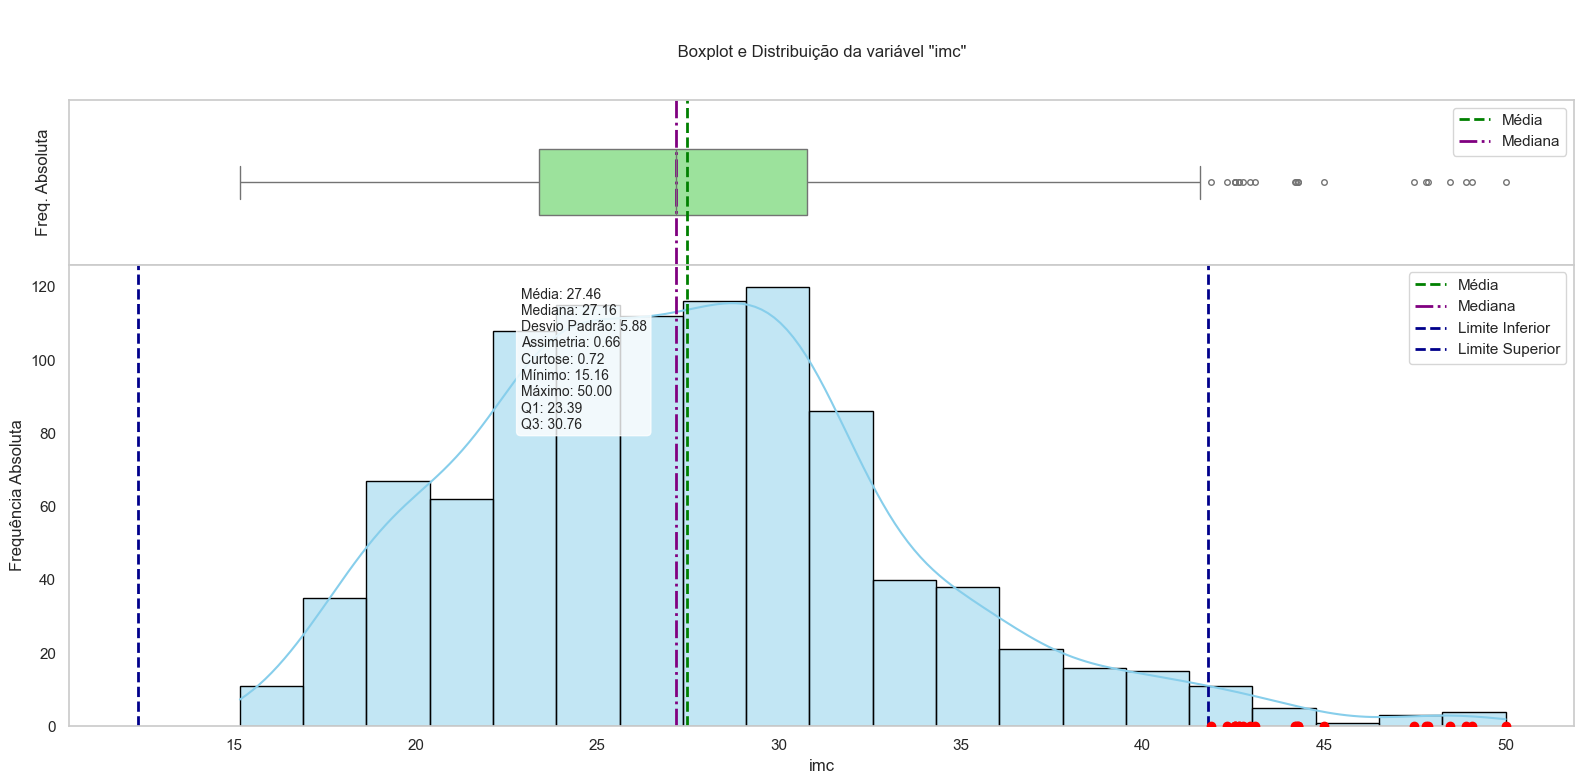

In [223]:
analise_estatistica_graficos(df_dados, 'imc' )

> 📄 Interpretação:
> 
📊 A distribuição é assimétrica à direita (cauda alongada para valores maiores), o que é comum em variáveis biométricas como IMC (Índice de Massa Corporal).

O pico de frequência está entre 25 e 30, com mais de 120 ocorrências no bin de maior densidade — o que indica que a maioria das pessoas da amostra está na faixa de sobrepeso (segundo a OMS, IMC entre 25 e 30).

📌 Outliers

Valores acima de 40 (IMC ≥ 40 é considerado obesidade grau III ou obesidade mórbida) são bem menos frequentes e aparecem como potenciais outliers.
Do lado oposto, há algumas ocorrências abaixo de 18.5 (limite inferior de IMC saudável), o que pode indicar baixo peso ou dados raros.

Uma análise por categorias de IMC (baixo peso, saudável, sobrepeso, obesidade I/II/III) pode ser útil para enriquecer insights ou treinar modelos com variáveis categóricas derivadas.

Q1: 30.0
Q3: 53.0
IQR (Interquartile Range): 23.0
--------------------------------------
Limite inferior 1.5: -4.5
Limite superior 1.5: 87.5
Número de outliers 1.5: 0


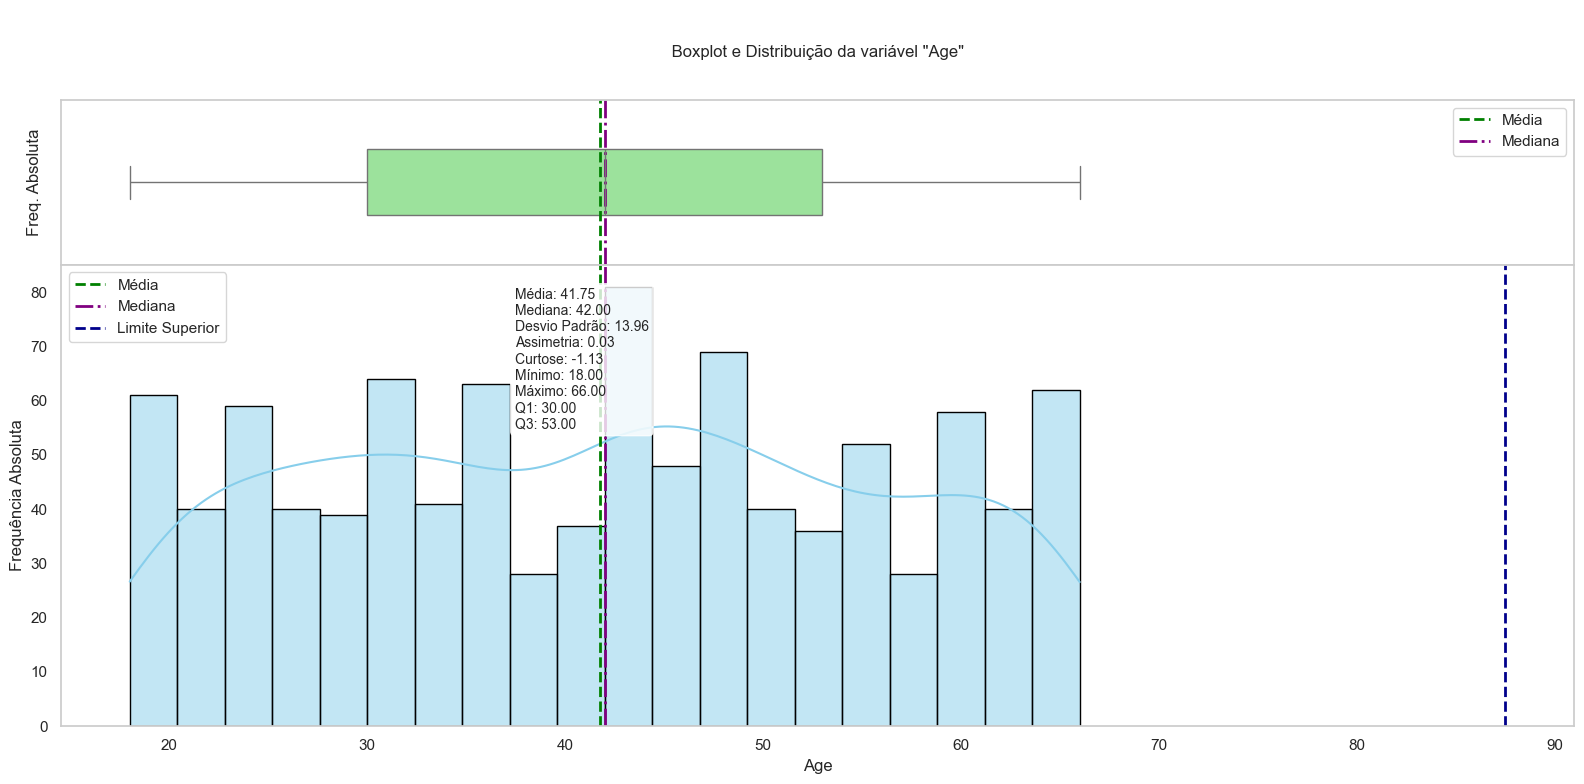

In [224]:
analise_estatistica_graficos(df_dados, 'Age' )

> Interpretação:
>
📊 A distribuição é razoavelmente uniforme em várias faixas etárias, sem grandes picos.

A variável "Age" varia entre 18 e 66 anos, não há outliers, pois todos os valores estão dentro dos limites calculados.

> Interpretação: Variáveis Quantitativas

**Questões sobre Compreensão geral das variáveis numéricas:**

- Qual é a distribuição das variáveis quantitativas? É normal? Assimétrica?
    - Informações presente no gráfico e logo abaixo informações detalhadas para cada variável.
- Quais são as medidas de tendência central (média, mediana, moda) ?
    - Informações presente no gráfico e logo abaixo informações detalhadas para cada variável.
- Quais são as medidas de dispersão (amplitude, desvio padrão, variância)
    - Informações presente no gráfico e logo abaixo informações detalhadas para cada variável.
- Existem outliers (valores extremos)?
    - Encontrados valores extremos em PremiumPrice e IMC, serão devidamentes tratados para modelagem do modelo preditivo.

### Análise de grupos categóricos sobre a Target:

,Variável,Grupos,Teste,p-valor,Resultado
0,Diabetes,"[0, 1]",Mann-Whitney U,0.0065,Significativo
1,BloodPressureProblems,"[0, 1]",Mann-Whitney U,0.0000,Significativo
2,AnyTransplants,"[0, 1]",Mann-Whitney U,0.0000,Significativo
3,AnyChronicDiseases,"[0, 1]",Mann-Whitney U,0.0000,Significativo
4,KnownAllergies,"[0, 1]",Mann-Whitney U,0.5658,Não significativo
5,HistoryOfCancerInFamily,"[0, 1]",Mann-Whitney U,0.0001,Significativo
6,ordem_faixa,"[6, 7, 5, 4]",Kruskal-Wallis,0.0000,Significativo
7,categoria_imc,"[Peso normal, Sobrepeso, Obesidade grau I, Aba...",Kruskal-Wallis,0.0080,Significativo
8,tem_doenca,"[0, 1]",Mann-Whitney U,0.0000,Significativo


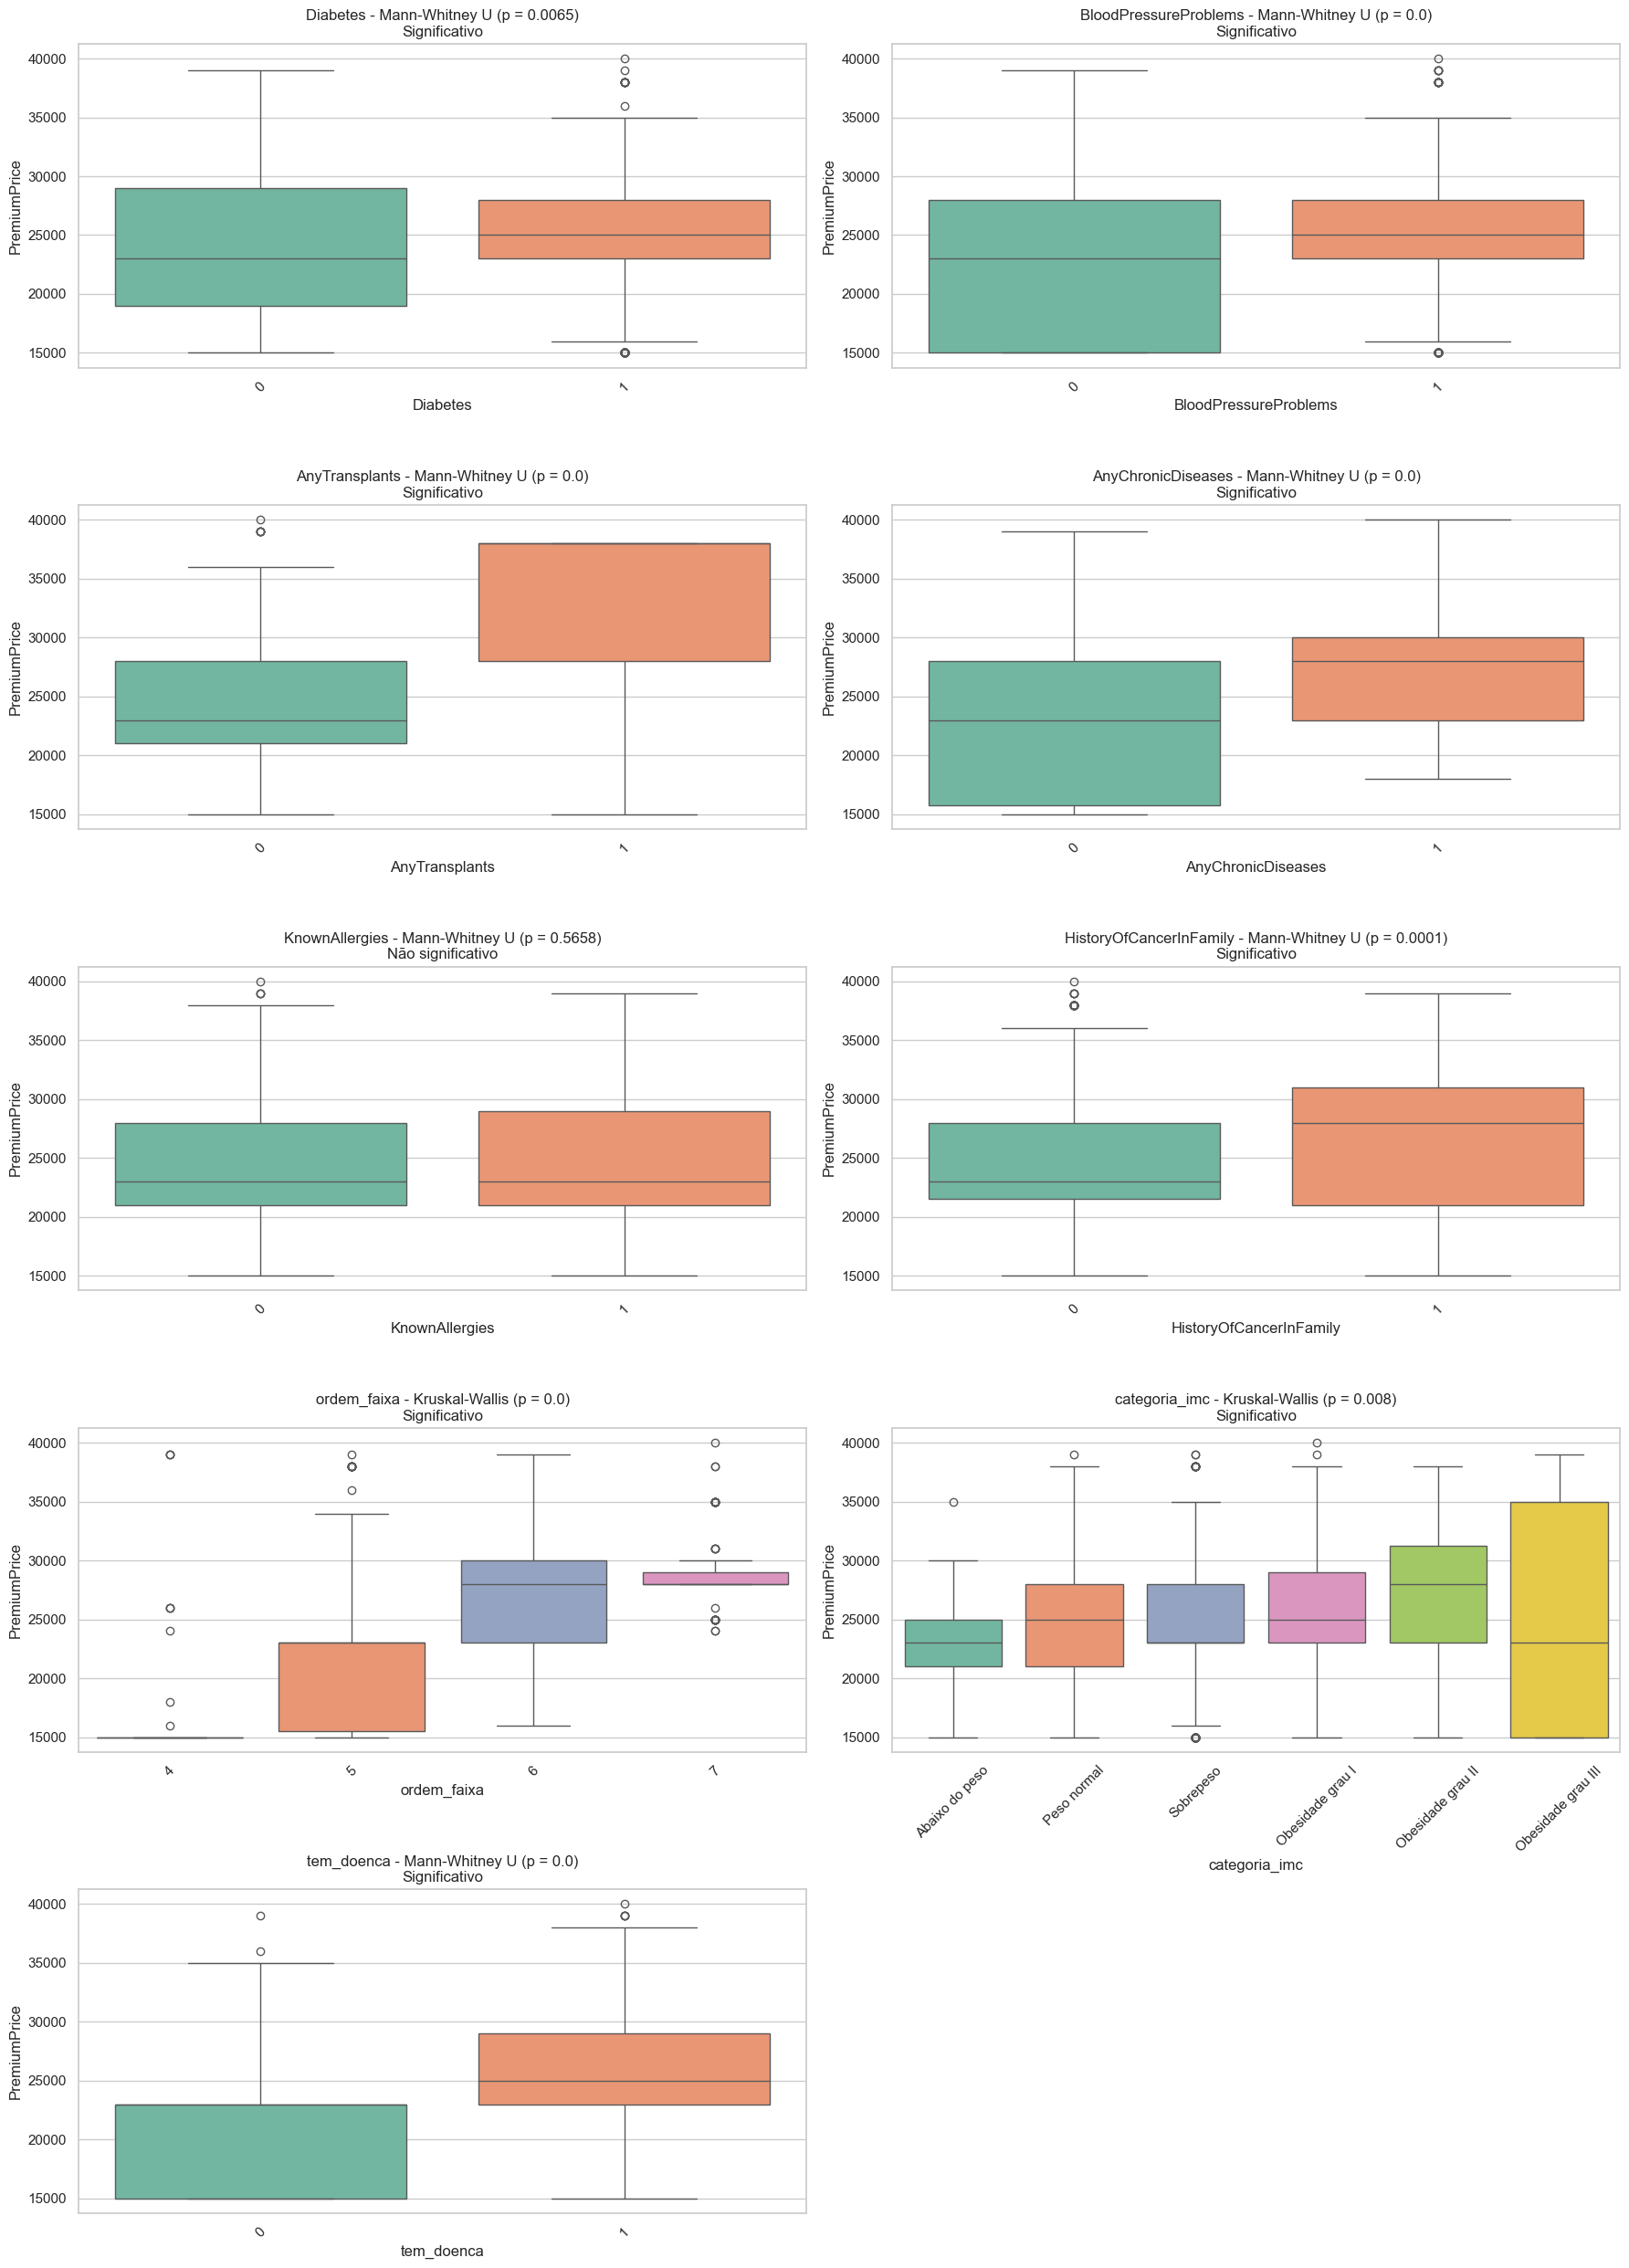

In [225]:
categorical_groups = [
    "Diabetes", "BloodPressureProblems", "AnyTransplants",
    "AnyChronicDiseases", "KnownAllergies", "HistoryOfCancerInFamily",
    "ordem_faixa", "categoria_imc", "tem_doenca"
]

resultado_testes = comparar_grupos_categoricos(df_dados, categorical_groups, "PremiumPrice")
display(resultado_testes)

plotar_boxplots_resultados(df_dados, resultado_testes, "PremiumPrice")
plt.tight_layout()
plt.show()

> 📄 Interpretação: Análise variáveis categóricas x variável alvo
>
Esse resultado mostra uma análise estatística de diferença entre grupos de variáveis categóricas com relação a variável alvo contínua. Foram feitos testes não paramétricos (Mann-Whitney e Kruskal-Wallis), que são mais robustos para dados que não seguem distribuição normal.

Exceto a variável KnownAllergies com p-valor = 0.5658 maior que 0.05 se mostrou não significativa com a variável alvo, as demais variáveis apresenta diferença estatística entre os grupos, indicando que aspectos como doenças crônicas, IMC, idade/faixa e histórico de saúde influenciam fortemente o comportamento medido pela variável-alvo.

Observa-se que o grupo que está em Obesidade grau III está distribuido por todas as faixas de preço do seguro, desde do valor mais baixo até o último valor.

Claramente não observa um padrão no valor, provavelmente o modelo não será capaz de generalizar a predição do valor do seguro para esse grupo.


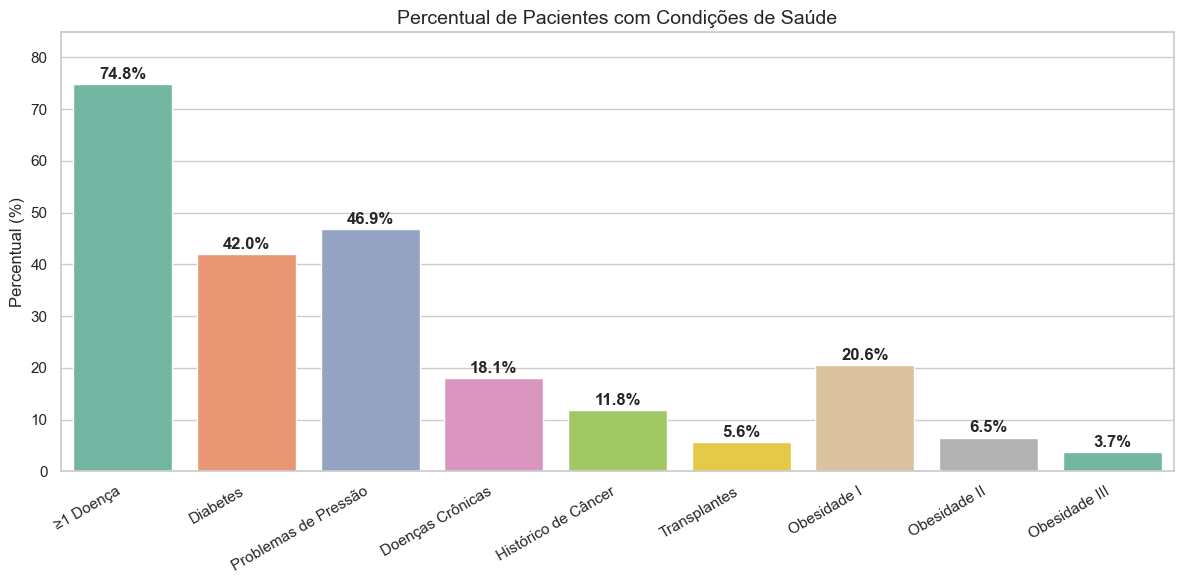

In [226]:
# Percentuais de condições médicas

df_dados['Obeso1'] = (df_dados['categoria_imc'] == 'Obesidade grau I').astype(int)
df_dados['Obeso2'] = (df_dados['categoria_imc'] == 'Obesidade grau II').astype(int)
df_dados['Obeso3'] = (df_dados['categoria_imc'] == 'Obesidade grau III').astype(int)

variaveis_saude = [
    'tem_doenca',
    'Diabetes',
    'BloodPressureProblems',
    'AnyChronicDiseases',
    'HistoryOfCancerInFamily',
    'AnyTransplants',
    'Obeso1', 'Obeso2', 'Obeso3'
]

rotulos = {
    'tem_doenca': '≥1 Doença',
    'Diabetes': 'Diabetes',
    'BloodPressureProblems': 'Problemas de Pressão',
    'AnyChronicDiseases': 'Doenças Crônicas',
    'HistoryOfCancerInFamily': 'Histórico de Câncer',
    'AnyTransplants': 'Transplantes',
    'Obeso1' : 'Obesidade I',
    'Obeso2' : 'Obesidade II',
    'Obeso3' : 'Obesidade III'
}

percentuais = [(df_dados[var].sum() / total_pacientes) * 100 for var in variaveis_saude]
nomes = [rotulos[var] for var in variaveis_saude]

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x=nomes, y=percentuais, palette='Set2')

plt.title('Percentual de Pacientes com Condições de Saúde', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xticks(rotation=30, ha='right')

for i, v in enumerate(percentuais):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.ylim(0, max(percentuais) + 10)
plt.tight_layout()
plt.show()

> Interpretação: Análise de variações médias sobre o Valor do Seguro e Condições de Saúde.

**Questões sobre Compreensão geral das variávies categóricas:**
- Frequência das variáveis categorias.
    - O gráfico mostra que aproximadamente 75% das pessoas apresenta alguma condição de saúde.
- Pessoas com doenças crônicas têm prêmio médio maior?
    - O gráfico evidênciou que pessoas com doenças crônicas pagam mais pelo seguro.
- Quem já fez transplante paga mais seguro?
    - A pessoa que submeteu há algum transplante o seguro é muito superior do que as pessoas que não fizeram transplantes.
- Existe diferença de média de PremiumPrice entre quem tem ou não histórico de câncer?
    - Sim, quem tem histórico de cancêr na família a média do seguro é superior.
- Qual é a distribuição etária dos indivíduos?
    - Pessoas mais jovens pagam em média valores mais baixos de seguro.
- Há diferença o preço do plano de saúde entre pessoas com e sem histórico familiar de câncer?

In [227]:
# Agrupar os dados por histórico de câncer na família
cancer_history_groups = df_dados.groupby('HistoryOfCancerInFamily')['PremiumPrice'].agg(['mean', 'median', 'std', 'count'])
cancer_history_groups.index = ['Sem histórico', 'Com histórico']
cancer_history_groups = cancer_history_groups.reset_index()
display(cancer_history_groups)

,index,mean,median,std,count
0,Sem histórico,24147.126437,23000.0,6117.864935,870
1,Com histórico,25758.620690,28000.0,7017.519306,116


Para responder à pergunta, se há diferença entre pessoas com e sem histórico familiar de câncer, o agrupamento não é suficiente. No entanto, aprofundar a análise com testes estatísticos não foi realizado, pois entendemos que a variável é significativa, mas não afeta a análise. Além disso, para afirmar com confiança estatística que existe uma diferença significativa, seria necessário realizar um teste estatístico apropriado (como teste t ou Mann-Whitney U).
O que é possível afirmar é que as pessoas com histórico familiar de câncer têm um preço médio maior que as pessoas sem histórico familiar de câncer.

### Análise de tendência Linear das variáveis quantitativas:

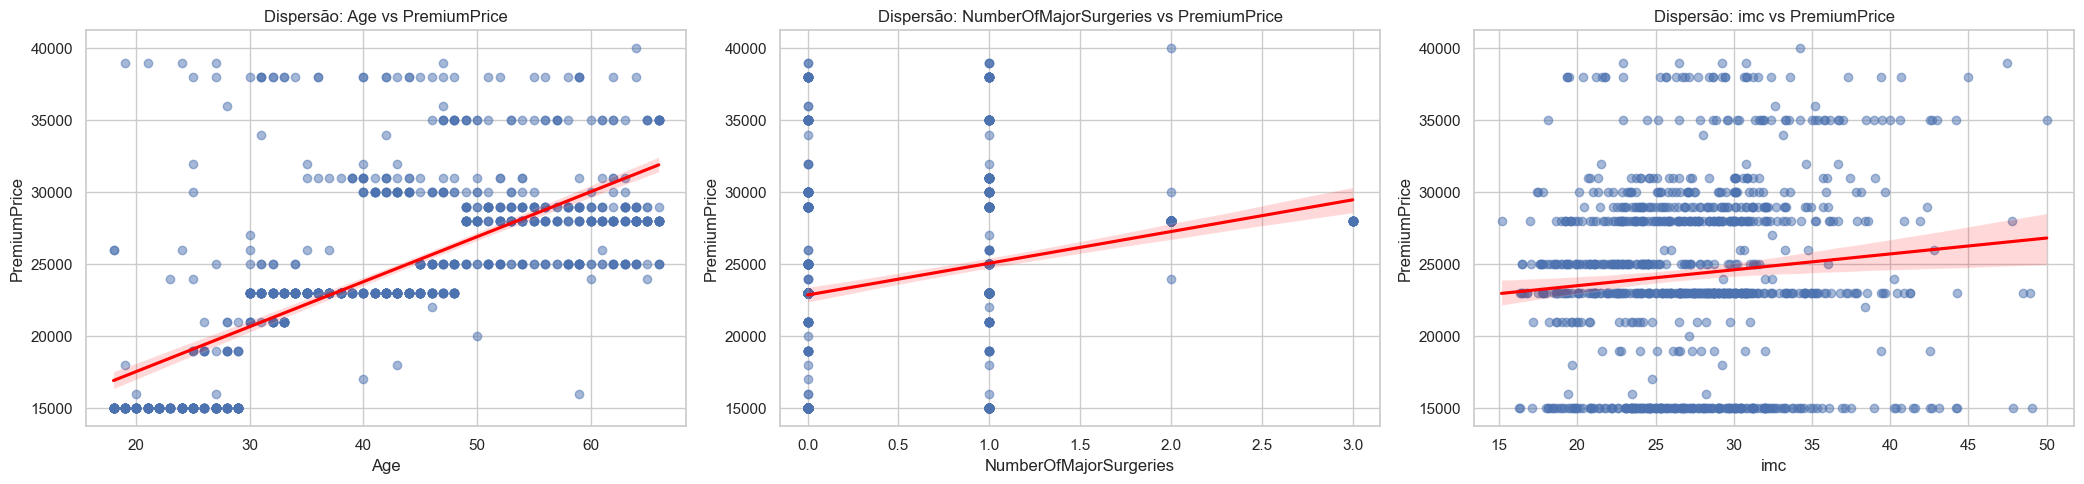

,variavel,pearson_r,pearson_p,spearman_r,spearman_p
0,Age,0.6975,0.0000,0.7391,0.0000
1,NumberOfMajorSurgeries,0.2642,0.0000,0.2895,0.0000
2,imc,0.1038,0.0011,0.0979,0.0021


In [228]:
# Analisar as correlações das variáveis dependentes quantitativas com a variável target
# Usando um gráfico de dispersão com linha de regressão
variaveis = ['Age', 'NumberOfMajorSurgeries', 'imc']
resultado_corr = analisar_correlacoes_com_target(df_dados, variaveis, 'PremiumPrice', exibir_graficos=True)
display(resultado_corr)

> 📄 Interpretação:
>
> 
* O coeficiente de correlação r diz o quão forte é a relação. Correlação positiva perfeita (+1), negativa perfeita (-1) e 0 nenhuma correlação.
* O p-valor significância estatística diz o quanto podemos confiar que a relação existe no geral. Um p-valor pequeno (geralmente < 0.05) indica que é muito improvável que aquela correlação tenha surgido por acaso.
  
Uma análise robusta olha os dois juntos:
* Primeiro: Verifica se o r é alto o bastante para ser interessante.
* Depois: Confirma se o p-valor é baixo o suficiente para dizer que essa relação é estatisticamente confiável.

**Conclusão:**

- A idade é o fator mais determinante no preço do prêmio de seguro, seguido pelo número de cirurgias importantes, enquanto o IMC tem um impacto relativamente pequeno.
- Todas as correlações são estatisticamente significativas (p-values < 0.05), o que indica que essas relações não são devidas ao acaso.
- As seguradoras parecem dar peso substancialmente maior à idade ao calcular os prêmios, provavelmente porque a idade está associada a um maior risco de problemas de saúde. O histórico cirúrgico também é considerado, mas em menor grau, enquanto o IMC, embora relevante, tem impacto limitado na precificação.

### Análise de Correlação e Multicolinearidade:

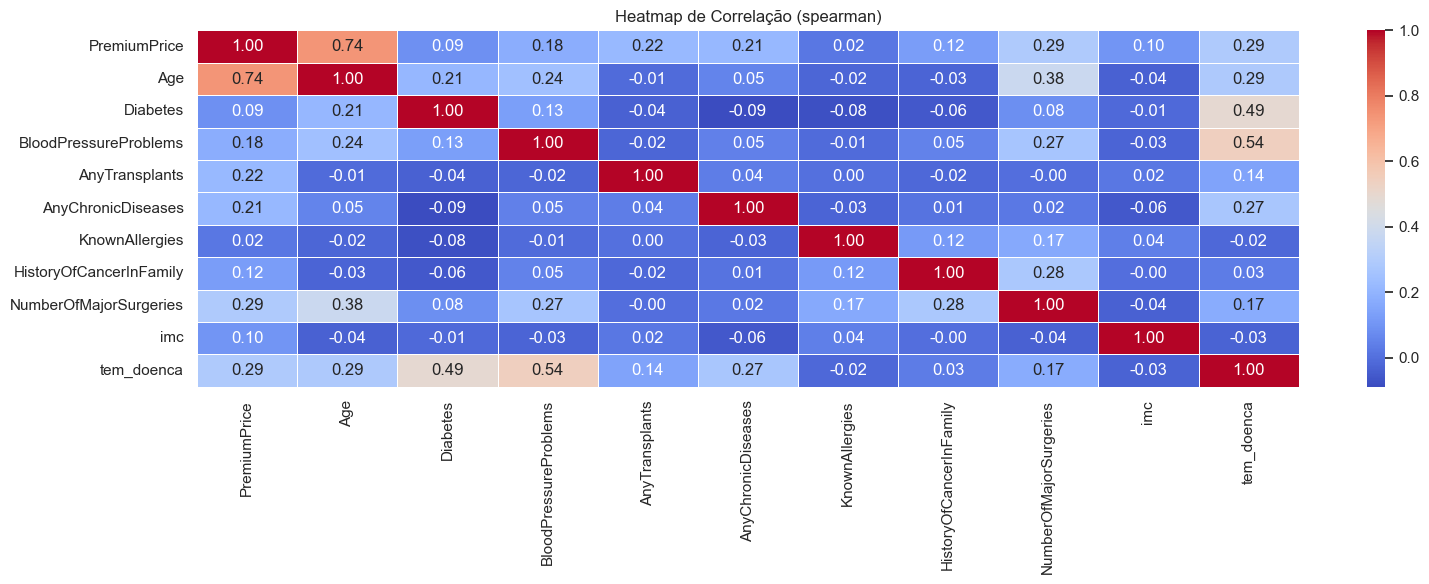

In [229]:
# Plotar o heatmap
variaveis = ['PremiumPrice', 'Age',
 'Diabetes',
 'BloodPressureProblems',
 'AnyTransplants',
 'AnyChronicDiseases',
 'KnownAllergies',
 'HistoryOfCancerInFamily',
 'NumberOfMajorSurgeries',
 'imc',
 'tem_doenca']
plotar_heatmap_correlacoes(df_dados, variaveis, metodo='spearman')

In [230]:
# Adicionando uma constante para regressão (necessário para statsmodels)
variaveis = ['PremiumPrice', 'Age',
 'Diabetes',
 'BloodPressureProblems',
 'AnyTransplants',
 'AnyChronicDiseases',
 'KnownAllergies',
 'HistoryOfCancerInFamily',
 'NumberOfMajorSurgeries',
 'imc',
 'tem_doenca']
df = df_dados[variaveis]
df = sm.add_constant(df)

# Calculando o VIF para cada variável independente
vif_data = pd.DataFrame()
vif_data["Variável"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data)


                   Variável        VIF
0                     const  37.333174
1              PremiumPrice   2.749135
2                       Age   2.823532
3                  Diabetes   1.601811
4     BloodPressureProblems   1.640374
5            AnyTransplants   1.285158
6        AnyChronicDiseases   1.284309
7            KnownAllergies   1.037190
8   HistoryOfCancerInFamily   1.121483
9    NumberOfMajorSurgeries   1.377926
10                      imc   1.057278
11               tem_doenca   2.475126


> Interpretação:

A variável alvo (PremiumPrice) tem forte correlação com Age(0.74) mais próximo de 1, seguida de NumberOfMajorSurgeries(0.29) correlação moderada.

Correlação quase nula com as variáveis Diabetes(0.09) e KnownAllergies (0.02), variáveis não relevantes para o modelo serão retiradas.

**Questões sobre Multicolinearidade:**
- Algumas variáveis estão fortemente correlacionadas entre si? Se sim, pode atrapalhar a regressão linear?
    - As variáveis não estão fortemente correlacionadas todas apresentaram VIF abaixo de 10, então não há colinearidade severa.
- Avaliar com: matriz de correlação + VIF (Variance Inflation Factor) 
    - Os índices de inflação da variação (VIF) para as variáveis indepentendes se mostraram Aceitável sem colinearidade.

### Análise por Cluster:

Foi adicionada uma análise de cluster para identificar grupos naturais nos dados, onde os indivíduos dentro de cada grupo compartilham características semelhantes entre si e são diferentes dos indivíduos em outros grupos O objetivo é tentar encontrar padrões importantes que não ficaram óbvios nas análises anteriores.

In [231]:
# Retirar valores extremos da variável target (PremiumPrice)
# Usando o metodo e interquartil

Q1 = df_dados['PremiumPrice'].quantile(0.25)
Q3 = df_dados['PremiumPrice'].quantile(0.75)
IQR = Q3 - Q1

limite_inf_1_5 = Q1 - 1.5 * IQR
limite_sup_1_5 = Q3 + 1.5 * IQR


df_dados_outlier = df_dados[
    (df_dados['PremiumPrice'] >= limite_inf_1_5) & 
    (df_dados['PremiumPrice'] <= limite_sup_1_5)
]
df_dados_outlier.reset_index(drop=True, inplace=True)

outliers_1_5 = df_dados[(df_dados['PremiumPrice'] < limite_inf_1_5) | (df_dados['PremiumPrice'] > limite_sup_1_5)]
print(f"Limite Inferior PremiumPrice: {limite_inf_1_5}")
print(f"Limite Superior PremiumPrice: {limite_sup_1_5}")
print(f"\nRetirado {outliers_1_5.shape[0]} registros considerados outliers. Total de registros para treino do modelo {df_dados_outlier.shape[0]}.")


Limite Inferior PremiumPrice: 10500.0
Limite Superior PremiumPrice: 38500.0

Retirado 6 registros considerados outliers. Total de registros para treino do modelo 980.


In [232]:
# Retirar o grupo de Obesidade Grau III
df_dados_outlier_obesidade = df_dados_outlier[(df_dados_outlier['categoria_imc'] != 'Obesidade grau III')]
df_dados_outlier_obesidade.reset_index(drop=True, inplace=True)

# Como analisado na etapa de análise o valor do seguro não está claro para esse grupo
# Retirar o grupo obesidade Grau III, pelo motivo de não observar variação do valor do seguro para este grupo
grupo_obesidade_III = df_dados_outlier[(df_dados_outlier['categoria_imc'] == 'Obesidade grau III')]
grupo_obesidade_III.shape[0]
print(f"\nRetirado {grupo_obesidade_III.shape[0]} registros com obesidade grau III. Total de registros para treino do modelo {df_dados_outlier_obesidade.shape[0]}.")



Retirado 35 registros com obesidade grau III. Total de registros para treino do modelo 945.


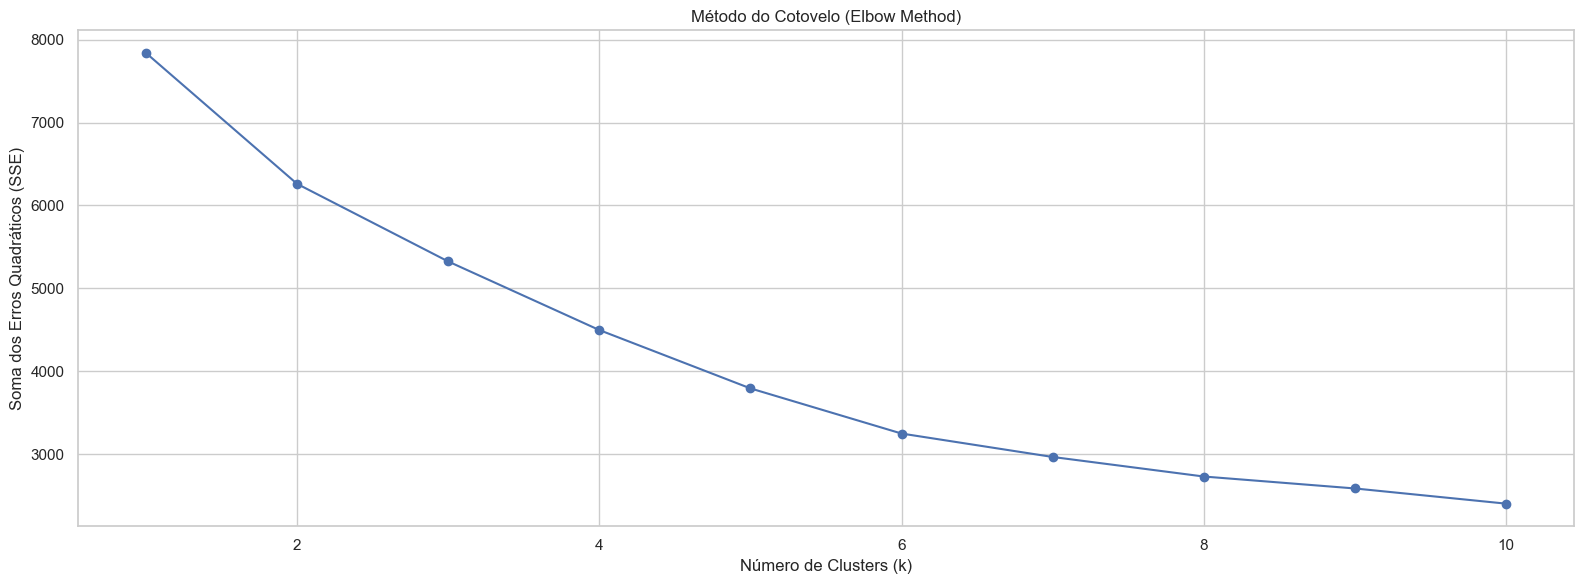

In [233]:
# Realizar a análise de agrupamento Clusterização
df_modelo = df_dados_outlier[['tem_doenca', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'imc', 'Age', 'PremiumPrice']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_modelo)

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(16, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Erros Quadráticos (SSE)')
plt.grid(True)
plt.tight_layout()
plt.show()

> Interpretação: Analise do Método do Cotovelo Elbow

Nesse gráfico mostra uma queda considerável para K= 2 ou 3, que seria o número ideal de Clusters.

In [234]:
# Aplicar K-Means com 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_modelo['Cluster'] = kmeans.fit_predict(X_scaled)
df_modelo.head()


,tem_doenca,AnyTransplants,AnyChronicDiseases,HistoryOfCancerInFamily,NumberOfMajorSurgeries,imc,Age,PremiumPrice,Cluster
0,0,0,0,0,0,23.725286,45,25000,1
1,1,0,0,0,0,22.530864,60,29000,0
2,1,0,0,0,1,23.634033,36,23000,1
3,1,0,1,0,2,27.770313,52,28000,0
4,1,0,1,0,1,31.934969,38,23000,0


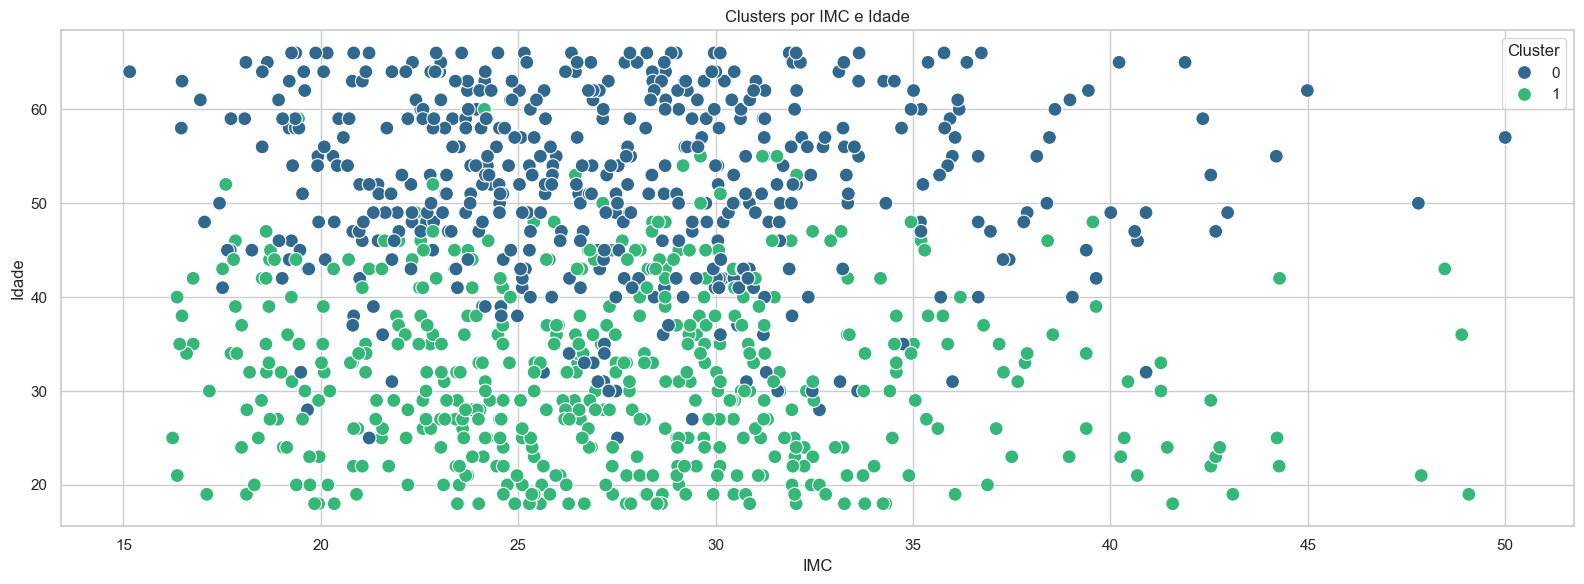

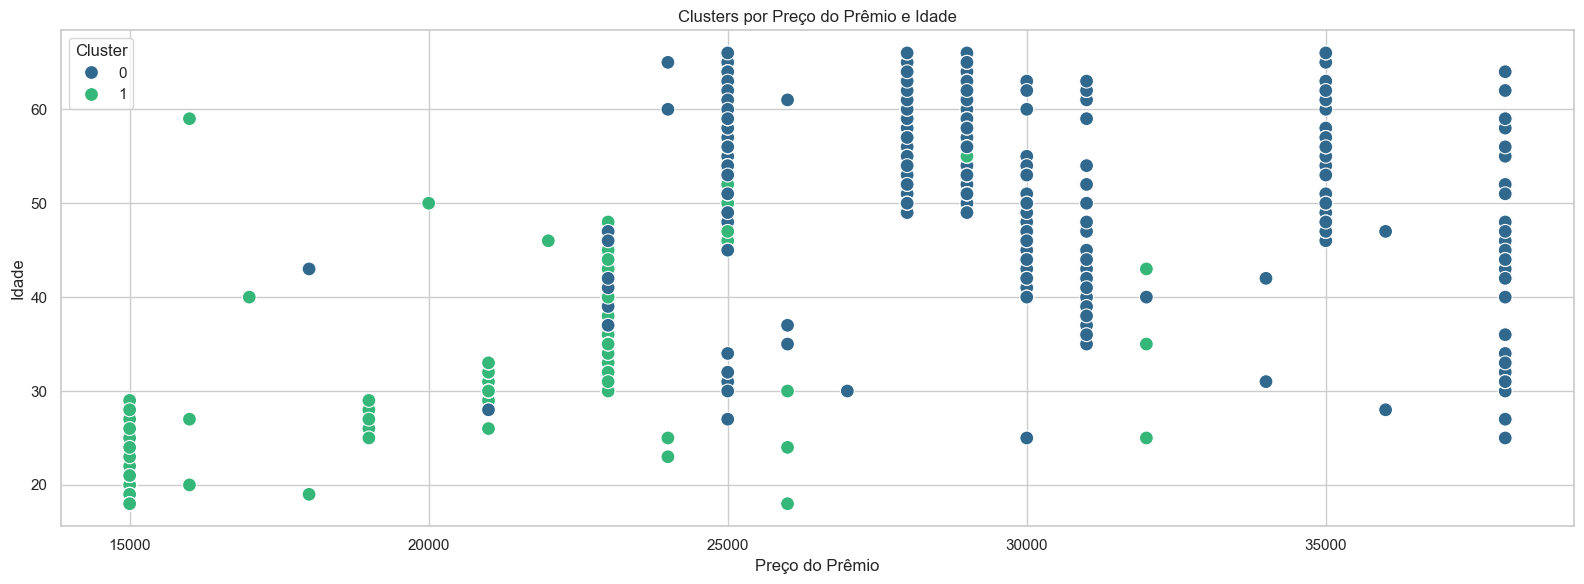

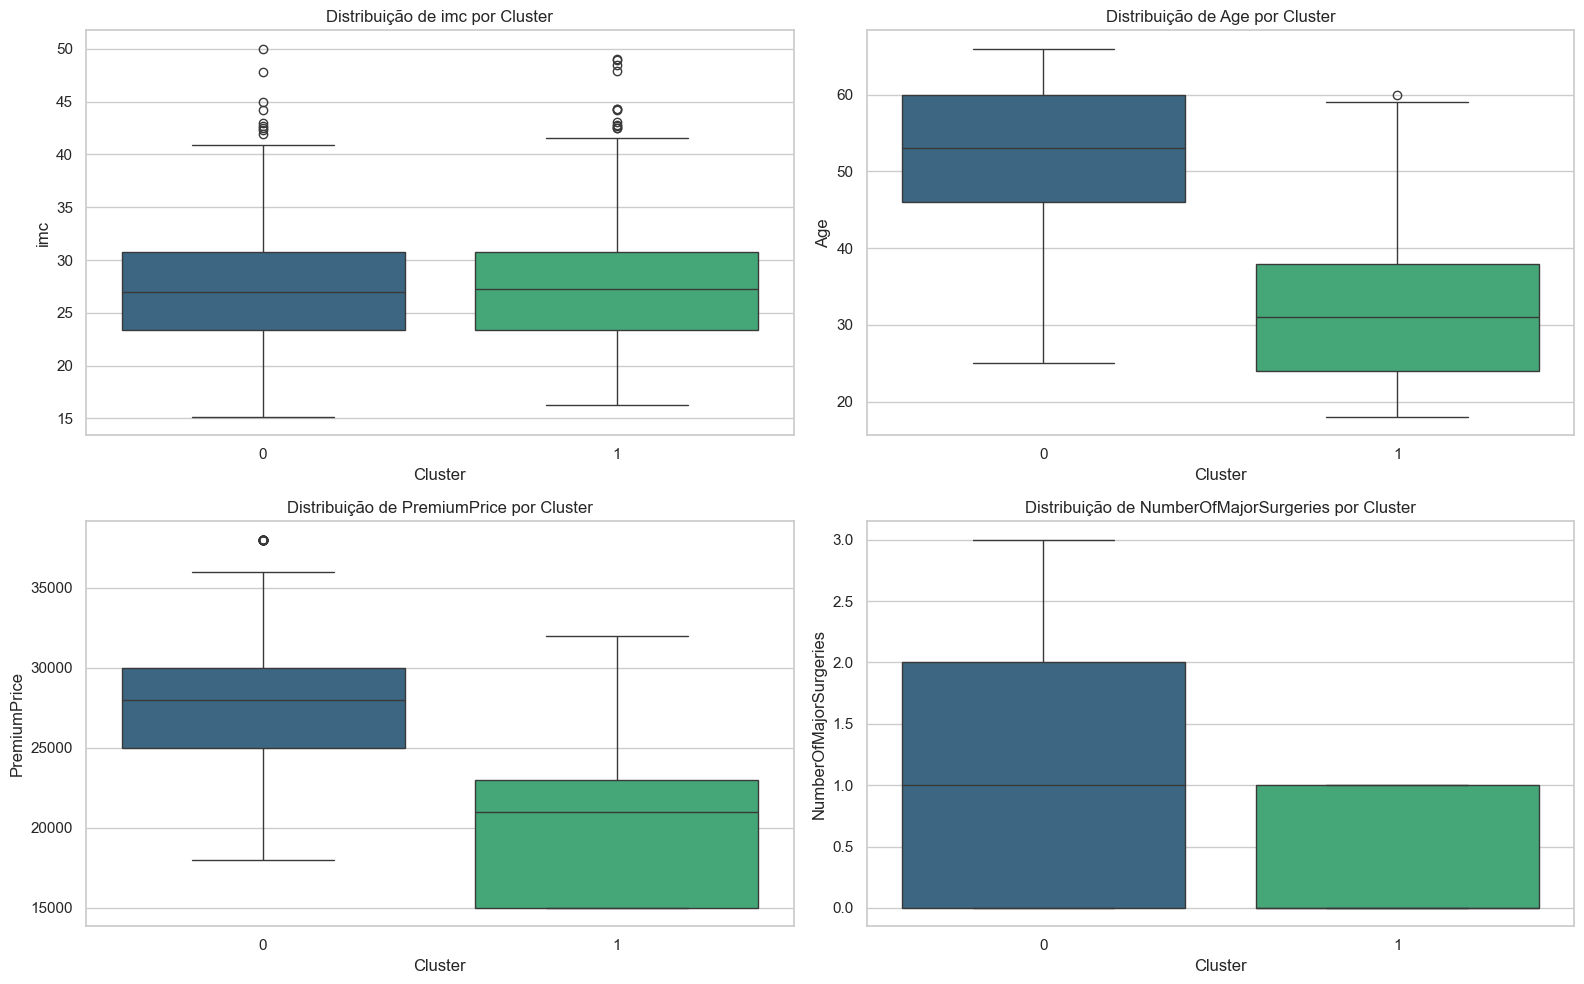

In [235]:
# Visualização 1: Distribuição dos clusters em relação ao IMC e Idade
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df_modelo, x='imc', y='Age', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters por IMC e Idade')
plt.xlabel('IMC')
plt.ylabel('Idade')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualização 2: Distribuição dos clusters em relação ao Preço do Prêmio e Idade
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df_modelo, x='PremiumPrice', y='Age', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters por Preço do Prêmio e Idade')
plt.xlabel('Preço do Prêmio')
plt.ylabel('Idade')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualização 3: Boxplot das variáveis por cluster
variaveis = ['imc', 'Age', 'PremiumPrice', 'NumberOfMajorSurgeries']
plt.figure(figsize=(16, 10))
for i, var in enumerate(variaveis):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df_modelo, x='Cluster', y=var, palette='viridis')
    plt.title(f'Distribuição de {var} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(var)
plt.tight_layout()
plt.show()


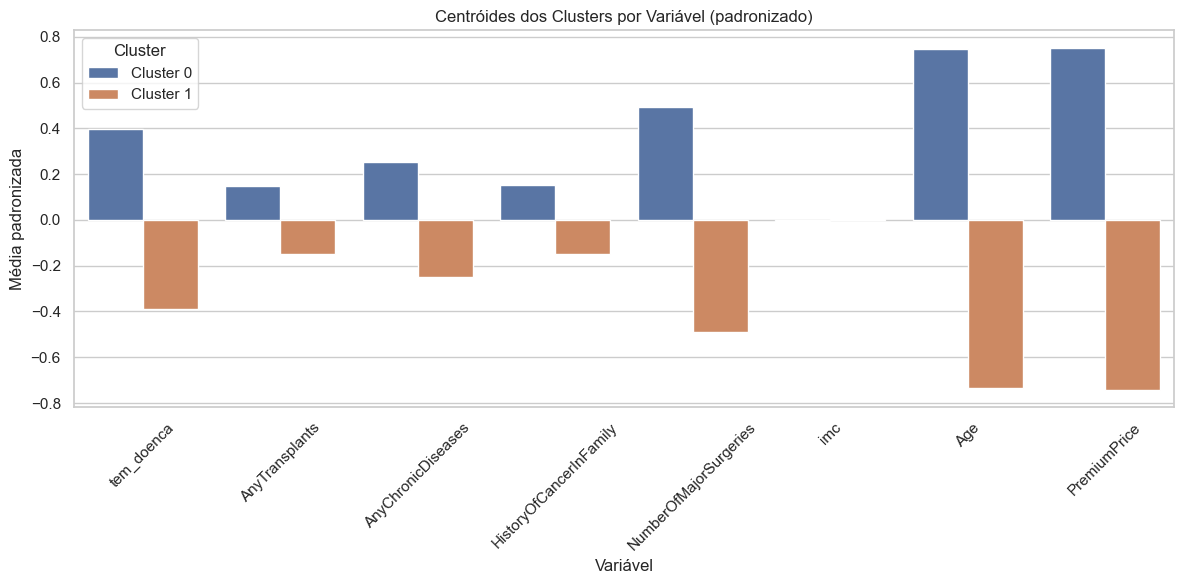

In [236]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_modelo.columns[:-1])  # exclui 'Cluster'
centroids.index = [f'Cluster {i}' for i in centroids.index]

centroids_long = centroids.reset_index().melt(id_vars='index', var_name='Variável', value_name='Valor')

# Gráfico para visualizar os centróides
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=centroids_long, x='Variável', y='Valor', hue='index')
plt.title('Centróides dos Clusters por Variável (padronizado)')
plt.ylabel('Média padronizada')
plt.xlabel('Variável')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> Interpretação: Analise da clusterização

A váriavel com mais influencia na formação do grupos foi a idade (Age), seguida da variável se tem cirurgia.

Pacientes mais jovens, com menos problemas de saúde, menos cirurgias, e que pagam um plano mais barato.

Pacientes mais velhos, com mais doenças ou histórico médico, e que pagam um plano mais caro.

Ou seja, o modelo agrupou pacientes mais jovens e saudáveis em um grupo, e pacientes mais velhos e com problemas de saúde em outro — o que é coerente com o que se esperaria em um plano de saúde.

Compreensão da variável alvo PremiumPrice com as demais variáveis independentes:
- O valor do prêmio parece seguir uma tendência linear ou não-linear com idade/IMC?
    - O gráfico de dispersão com regressão linear mostra forte tendência linear, quanto mais idade mais aumenta o valor do seguro.
- Há evidências de que imc influencia o valor do seguro?
    - No mapa de calor a correlação é muito baixa (0.10) e na clusterização também ficou evidênciado a baixa influência.
- Qual o prêmio médio pago por pessoas com e sem doenças crônicas?
    - Aproximadamente o prêmio pago de pessoas sem doenças é 23.000, já para quem possui doença fica em torno de 28.000.
- Clientes com múltiplas comorbidades têm prêmios mais altos?
    - Clientes com alguma doença tem prêmios mais alto.
- PremiumPrice varia significativamente com a idade?
    - De acordo com o teste estatístico Kruskal-Wallis, sim tem variação significativa. 
- Quais faixas etárias concentram os maiores valores de prêmio?
    - As faixa etárias meia-idade e idoso tem os maiores valores de prêmio.
- Qual é a média de PremiumPrice por faixa etária (ex: 18–24, 25–39, etc)?
    - O valor médio varia conforme as faixas comprovado pelo teste estatístico Kruskal-Wallis.
    - Valores:    Jovem adulto(15286.88), Adulto (21727.58), Meia-idade (27325.87), Idoso (28748.09)
- Quais variáveis têm maior correlação com o valor do seguro?
    - Em primeiro lugar a variável Age, seguida de variável NumberOfMajorSurgeries.

In [237]:
df_dados_outlier_obesidade.groupby('faixa_etaria')['PremiumPrice'].mean()


faixa_etaria
Primeira infância             NaN
Infância                      NaN
Adolescência                  NaN
Jovem adulto         15286.885246
Adulto               21727.586207
Meia-idade           27325.870647
Idoso                28748.091603
Idoso longevo                 NaN
Name: PremiumPrice, dtype: float64

In [238]:
df_dados_outlier_obesidade['Cluster'] = df_modelo[['Cluster']]

In [239]:
df_dados_outlier_obesidade.shape

(945, 20)

> Salvando o dataset que será usado na modelagem

In [240]:
# 
df_dados_outlier_obesidade.to_csv('data/dados_projeto_analise.csv', index = False)

## Fim Etapa 3 - Análise Exploratória / Pré-Processamento dos Dados

> A etapa seguinte é a modelagem que está no arquivo **Tech_Challenge_Modelagem.ipynb**